In [1]:
import numpy as np
import os
import yaml
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from glob import glob
from pprint import pprint
from corner import corner
from tqdm import tqdm

from mejiro.analysis import lensing
from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import SampleBELLS, SampleSL2S, SampleGG

# read configuration file
with open('/grad/bwedig/mejiro/projects/roman/pipeline/training_set.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/data/bwedig/.conda/envs/mejiro-v2/lib/python3.10/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '03')

failed_pickles = sorted(glob(os.path.join(data_dir, 'failed_*.pkl')))
print(f'Found {len(failed_pickles)} failed pickle(s) in {data_dir}')

successful_pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'lens_*.pkl')))
print(f'Found {len(successful_pickles)} successful pickle(s) in {data_dir}')

Found 33 failed pickle(s) in /data/bwedig/mejiro/training_set_dev/03
Found 825 successful pickle(s) in /data/bwedig/mejiro/training_set_dev/03


In [4]:
failed_lenses, successful_lenses = [], []

for f in tqdm(failed_pickles):
    failed_lenses.append(util.unpickle(f))

for f in tqdm(successful_pickles):
    successful_lenses.append(util.unpickle(f))

100%|██████████| 825/825 [06:14<00:00,  2.20it/s]


In [10]:
def weights(data):
    return 1 / len(data) * np.ones(len(data))

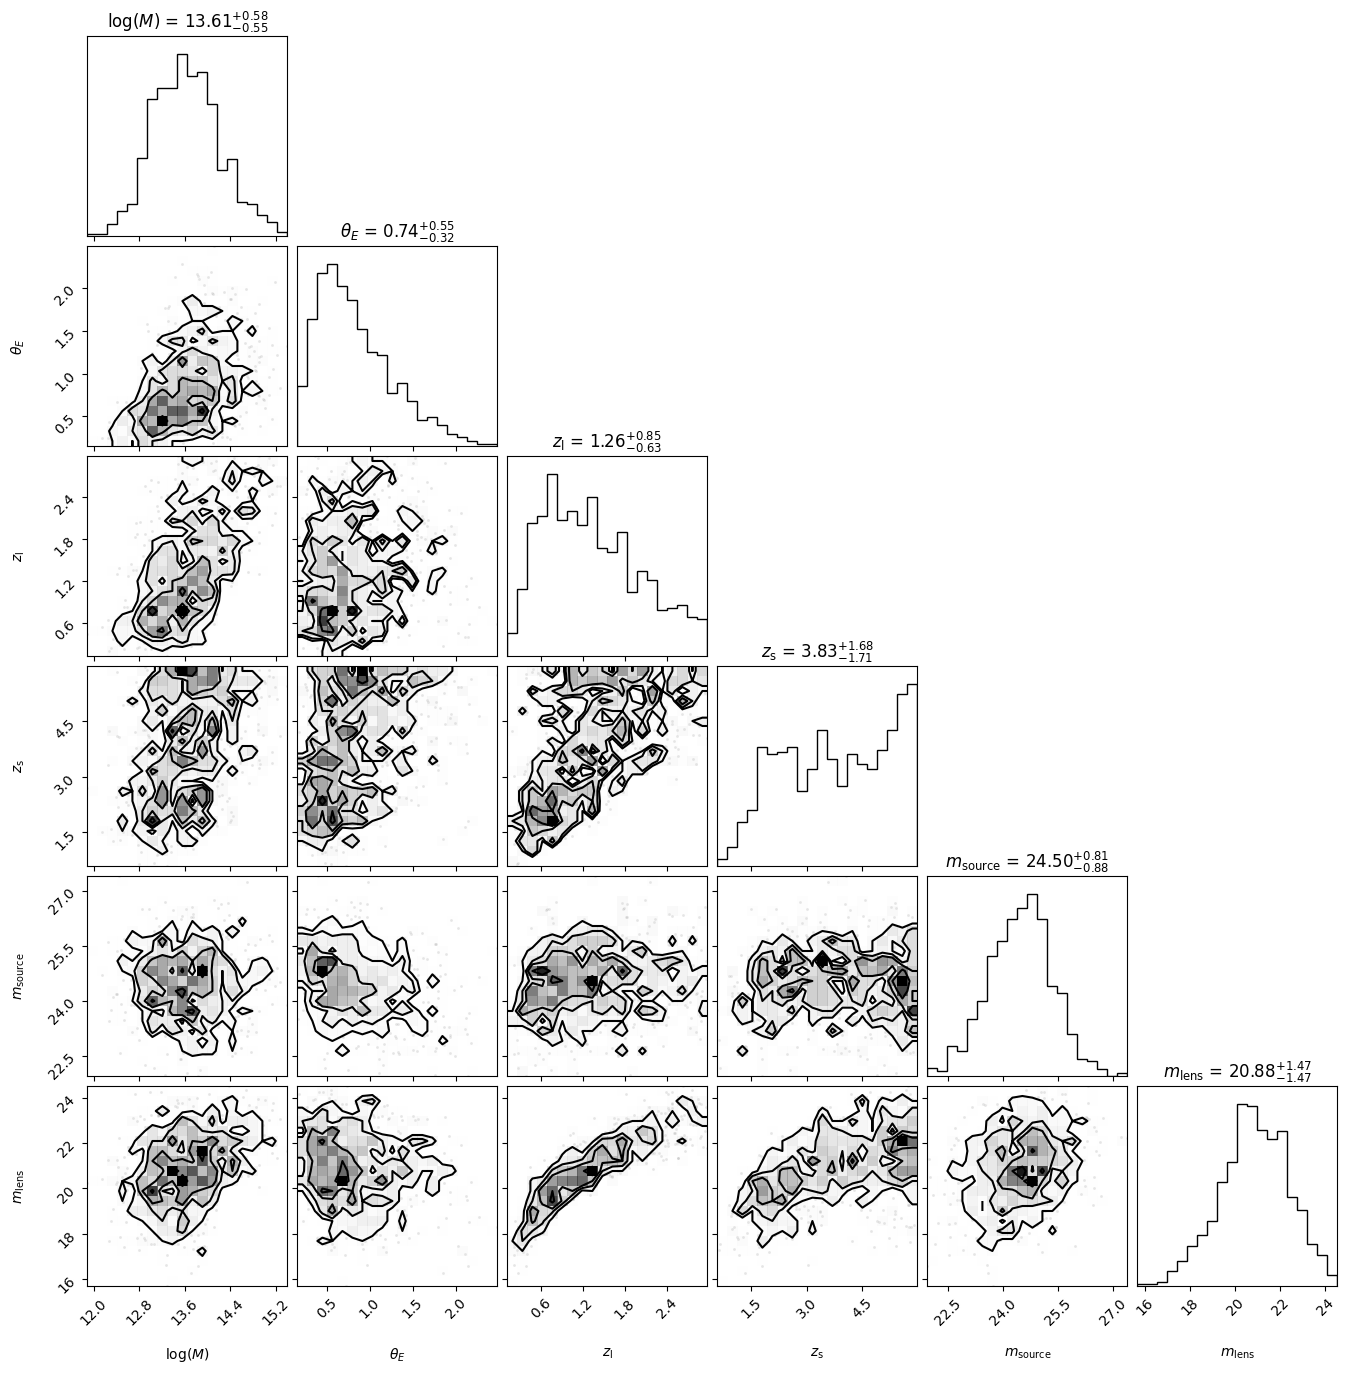

In [11]:
band = 'F129'

labels = [
    r"$\log(M)$",
    r"$\theta_E$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$m_{\rm source}$",
    r"$m_{\rm lens}$",
]

successful, failed = [], []

for lens in successful_lenses:
    successful.append([
        np.log10(lens.get_main_halo_mass()),
        lens.get_einstein_radius(),
        lens.z_lens,
        lens.z_source,
        lens.physical_params['magnitudes']['source'][band],
        lens.physical_params['magnitudes']['lens'][band],
    ])

for lens in failed_lenses:
    failed.append([
        np.log10(lens.get_main_halo_mass()),
        lens.get_einstein_radius(),
        lens.z_lens,
        lens.z_source,
        lens.physical_params['magnitudes']['source'][band],
        lens.physical_params['magnitudes']['lens'][band],
    ])

successful_corner = corner(np.array(successful), labels=labels, show_titles=True, weights=weights(successful))

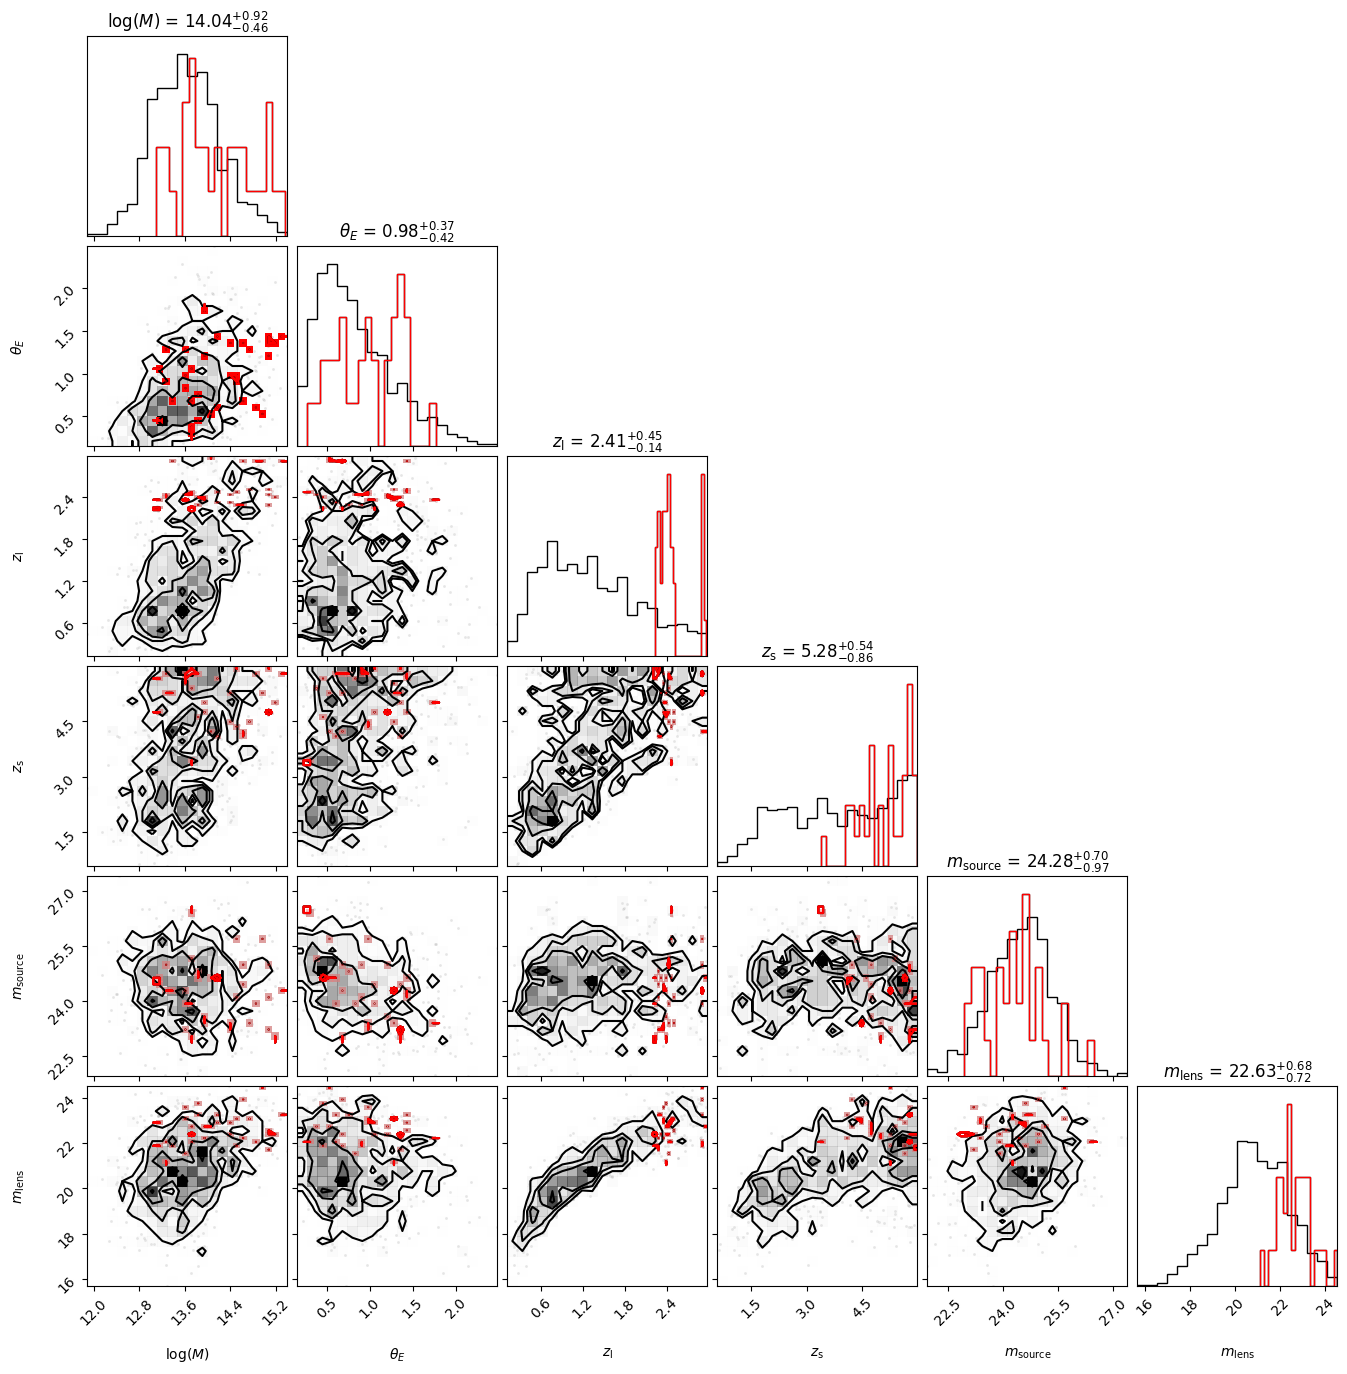

In [13]:
corner(np.array(failed), labels=labels, show_titles=True, weights=weights(failed), fig=successful_corner, color='red')